<a href="https://colab.research.google.com/github/ZRooker/AI/blob/main/AI_Hw_4_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

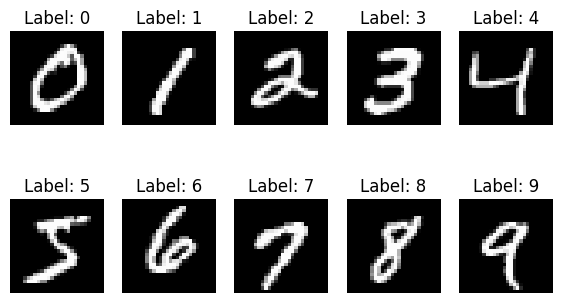

In [2]:
#Loading in our dataset of MNIST from keras
data_set = keras.datasets.mnist.load_data()
(X_train, y_train), (X_test, y_test) = data_set

# Display random MNIST datasets
fig, axs = plt.subplots(2, 5, figsize=(7, 4))
axs = axs.flatten()
for i in range(10):
    img = X_train[y_train == i][0]
    axs[i].imshow(img, cmap='gray')
    axs[i].set_title(f'Label: {i}')
    axs[i].axis('off')
plt.show()

In [3]:
# Preprocess the data by scaling pixel values to a range of 0 to 1
X_train = X_train/ 255.0
X_test = X_test/ 255.0

# Define the Convolutional Neural Network (CNN)
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu',input_shape=(28, 28,1)),
    keras.layers.MaxPooling2D(pool_size = (2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

#The layers were chosen as I wanted a convolution of 32 filters as it is sufficient
# in getting the features we need. If we increased it then the CNN could recognize 
# more complex patterns. Then we have max pooling to reduce spatial dimensions, 
# then again repeating with another 64 filters, and max pooling, now we need to 
#flatten the output of the max pooling layer and I added a dense layer of 128
#to end it we have  a dropout of .5 to prevent overfitting. Then the dense layer
#with a supermax will give us the output probabilities. 

# Compile the model with the Adam optimizer and categorical cross-entropy loss
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on the training data; 20% being tested
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
1500/1500 [==============================] - 67s 43ms/step - loss: 0.2257 - accuracy: 0.9300 - val_loss: 0.0568 - val_accuracy: 0.9842
Epoch 2/10
1500/1500 [==============================] - 58s 39ms/step - loss: 0.0846 - accuracy: 0.9753 - val_loss: 0.0448 - val_accuracy: 0.9877
Epoch 3/10
1500/1500 [==============================] - 59s 39ms/step - loss: 0.0596 - accuracy: 0.9820 - val_loss: 0.0393 - val_accuracy: 0.9889
Epoch 4/10
1500/1500 [==============================] - 59s 39ms/step - loss: 0.0469 - accuracy: 0.9856 - val_loss: 0.0358 - val_accuracy: 0.9893
Epoch 5/10
1500/1500 [==============================] - 57s 38ms/step - loss: 0.0396 - accuracy: 0.9881 - val_loss: 0.0413 - val_accuracy: 0.9896
Epoch 6/10
1500/1500 [==============================] - 57s 38ms/step - loss: 0.0345 - accuracy: 0.9893 - val_loss: 0.0399 - val_accuracy: 0.9886
Epoch 7/10
1500/1500 [==============================] - 63s 42ms/step - loss: 0.0308 - accuracy: 0.9901 - val_loss: 0.0418 -

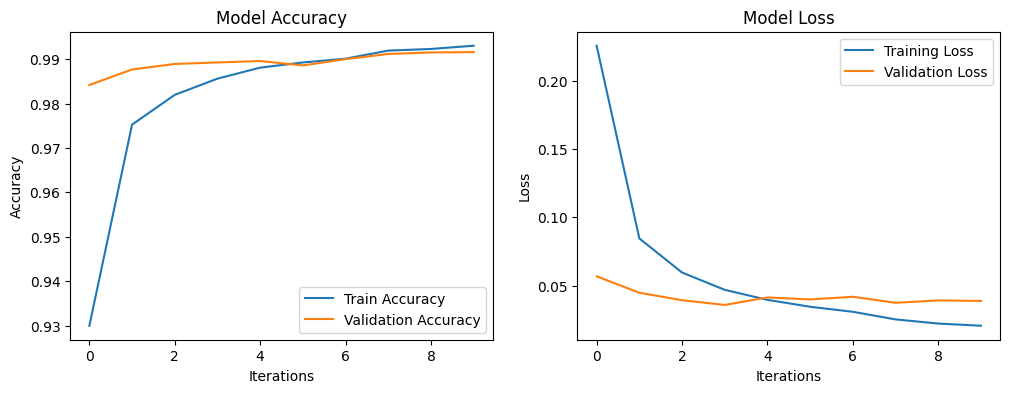

In [23]:

# Plot the training and validation accuracy vs. iterations
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy', 'Validation Accuracy'], loc='lower right')

# Plot the training and validation loss vs. iterations
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')

plt.show()